# Practicing Feature Scaling
The Titanic data frames describe the survival status of individual passengers on the Titanic.

Source the data from the Kaggle repository here: https://www.kaggle.com/c/titanic/data

Follow these instructions and answer the questions using Python and Scikit-Learn:
* Build a prediction model using a classifier of your choice
* Measure the performance of the classifier with the right metrics (E.g: R-squared for regression)
* Do the features of the dataset need to be rescaled? Explain
* If yes, standardize and normalize the features. Build your model on the scaled data and compare the results
* Compare the performance of your classifier when applied on data scaled with Normalizer and MinMaxScaler

In [2]:
import os
import io
import re
import nltk
import gzip
import spacy
import string
import random
import secrets
import datetime
import requests
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import svm
import plotly.io as pio
from sklearn import tree
from typing import Counter
import plotly.express as px
from fuzzywuzzy import fuzz
from joblib import dump, load
from bs4 import BeautifulSoup
import category_encoders as ce
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import plotly.graph_objects as go
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from textblob import TextBlob, Word
from scipy.cluster import hierarchy
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from sklearn.decomposition import PCA
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from scipy.spatial.distance import pdist, squareform
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from flask import Flask, request, render_template, session, url_for, redirect
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer,
                                   PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, TargetEncoder


c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns

# Charger les données
titanic = pd.read_csv('train.csv')
# Afficher le jeu de données Titanic
print(titanic)

# Sélectionner les caractéristiques et la variable cible
X = titanic.drop(['Survived'], axis=1)
y = titanic['Survived']

# Prétraiter les caractéristiques numériques : remplir les valeurs manquantes avec la moyenne
num_features = X.select_dtypes(include=['int64', 'float64']).columns
num_transformer = SimpleImputer(strategy='mean')


# Prétraiter les caractéristiques catégorielles : remplir les valeurs manquantes avec 'missing', puis effectuer une codification à chaud
cat_features = X.select_dtypes(include=['object']).columns
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner le prétraitement pour les caractéristiques numériques et catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ])

# Créer le pipeline de prétraitement et d'entraînement
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Entraîner le pipeline
pipeline.fit(X_train, y_train)

# Prédire sur l'ensemble de test
predictions = pipeline.predict(X_test)

# Mesurer les performances
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (without scaling): {accuracy}')

# Ajouter maintenant la mise à l'échelle au pipeline
scalers = {'StandardScaler': StandardScaler(
), 'MinMaxScaler': MinMaxScaler(), 'Normalizer': Normalizer()}

for scaler_name, scaler in scalers.items():
    # Ajouter le normalisateur au pipeline
    pipeline.set_params(preprocessor__num=Pipeline(steps=[('imputer', num_transformer),
                                                          ('scaler', scaler)]))
    # Entraîner le pipeline
    pipeline.fit(X_train, y_train)

    # Prédire sur l'ensemble de test
    predictions_scaled = pipeline.predict(X_test)

    # Mesurer les performances
    accuracy_scaled = accuracy_score(y_test, predictions_scaled)
    print(f'Accuracy ({scaler_name}): {accuracy_scaled}')


     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

Follow these instructions and answer the questions using Python and Scikit-Learn:
* Build a prediction model using a classifier of your choice
* Measure the performance of the classifier with the right metrics (E.g: R-squared for regression)
* Do the features of the dataset need to be rescaled? Explain
* If yes, standardize and normalize the features. Build your model on the scaled data and compare the results
* Compare the performance of your classifier when applied on data scaled with Normalizer and MinMaxScaler


PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

<Axes: ylabel='count'>

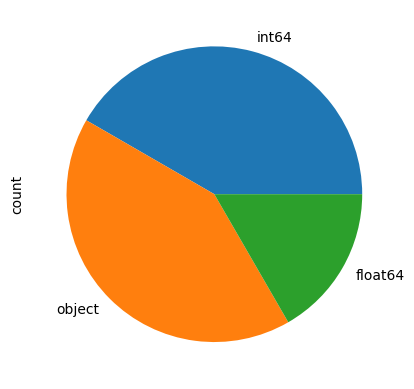

In [8]:
df = pd.read_csv('train.csv')
your_dataframe=df
pd.set_option('display.max_row' ,111)
df.value_counts()
print(df.value_counts())
your_dataframe.dtypes.value_counts().plot.pie()


In [11]:
df.info()
print(f"\ndf.info() :\n{df.value_counts()} col {df.columns.tolist()} \n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

df.info() :
PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)

In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, OneHotEncoder

df=titanic
df['Sex'].replace({'male':0, 'female':1}, inplace=True)
colonne_texte=df.select_dtypes('object').columns
colonne_numerique=df.select_dtypes(include=['float','int64']).columns
print(f"\n colonne_texte:\n{colonne_texte} \n")
print(f"\n colonne_numerique\n{colonne_numerique} \n")
# standaridisation avec onehotencoder
preprocessing_onehotencoder=OneHotEncoder(handle_unknown='ignore')
matrice_creuse=preprocessing_onehotencoder.fit_transform(df[colonne_texte])
print(f"\n colonne_texte:\n{df.head(5)} \n")
print(f"\n colonne_texte:\n{matrice_creuse} \n")



 colonne_texte:
Index(['Name', 'Ticket', 'Cabin', 'Embarked'], dtype='object') 


 colonne_numerique
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object') 


 colonne_texte:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 2

In [13]:
for col in df.select_dtypes(include=['float64','int64']):
    print(f"Moyenne col: {col:-<50}  {df[col].mean()} ")


Moyenne col: PassengerId---------------------------------------  446.0 
Moyenne col: Survived------------------------------------------  0.3838383838383838 
Moyenne col: Pclass--------------------------------------------  2.308641975308642 
Moyenne col: Sex-----------------------------------------------  0.35241301907968575 
Moyenne col: Age-----------------------------------------------  29.69911764705882 
Moyenne col: SibSp---------------------------------------------  0.5230078563411896 
Moyenne col: Parch---------------------------------------------  0.38159371492704824 
Moyenne col: Fare----------------------------------------------  32.204207968574636 


c:\Users\romar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:374: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


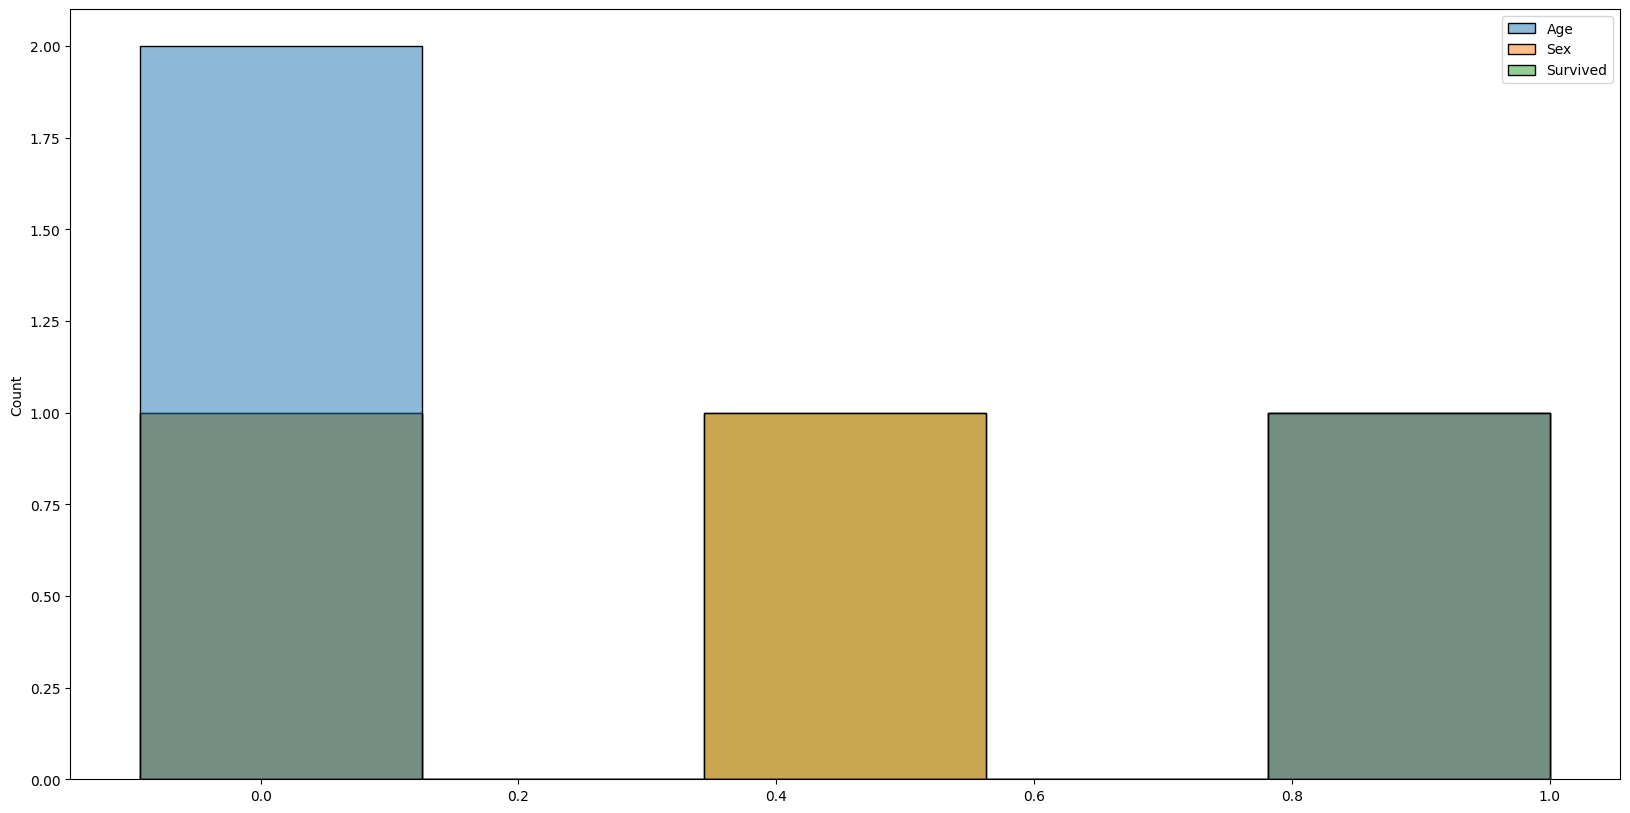

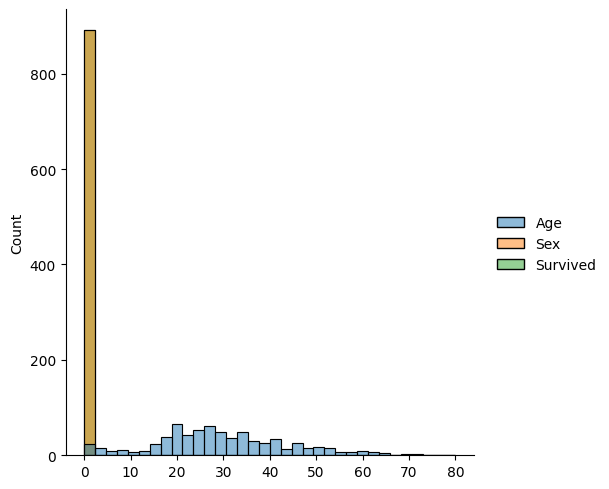

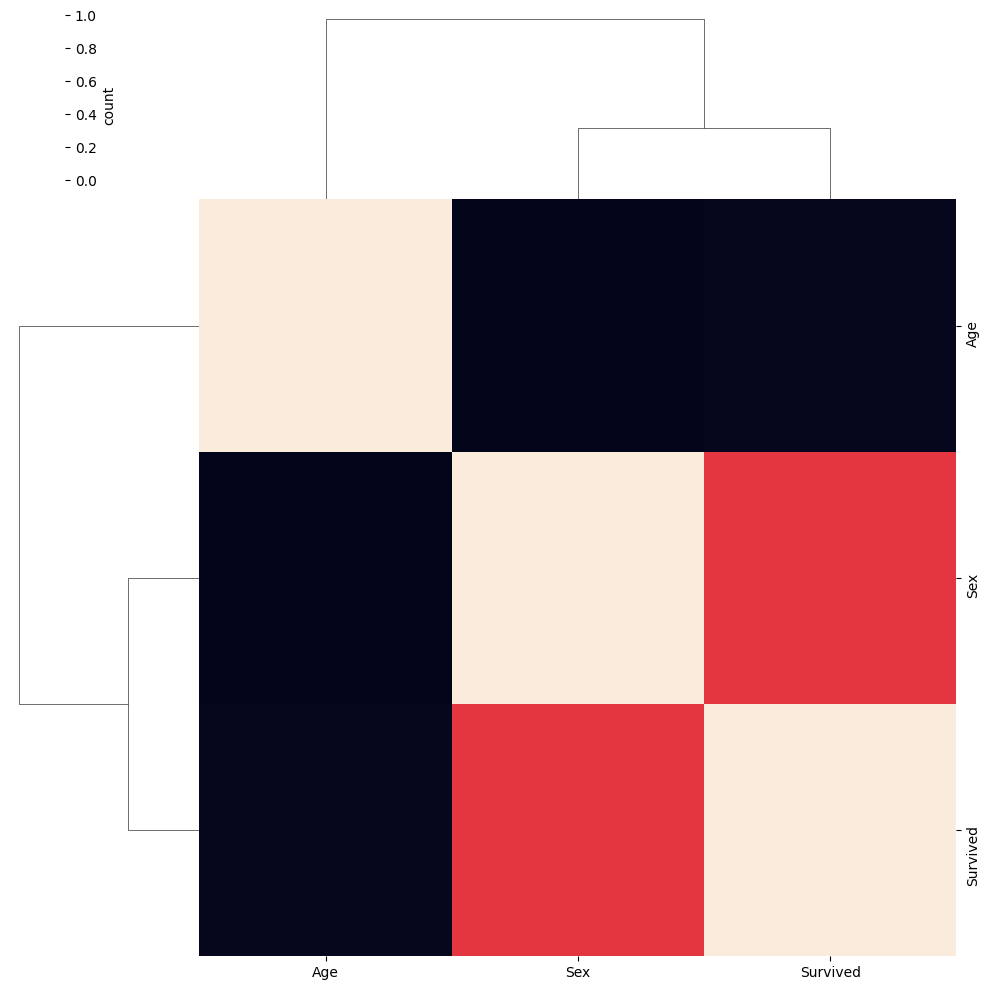

In [14]:
plt.figure(figsize =(20,10))
sns.histplot(df[['Age','Sex','Survived']].dropna().corr())
sns.displot(df[['Age','Sex','Survived']], label='Survived')
sns.clustermap(df[['Age','Sex','Survived']].dropna().corr())
sns.countplot(df[['Age','Sex','Survived']].dropna().corr())

plt.show()


In [20]:
for col in df.columns:
    if col not in ['Age', 'Sex', 'Survived']:
        print(f"\nCrosstab for columns 'Age', 'Sex', 'Survived' and '{col}':")
        print(pd.crosstab(index=[df['Age'], df['Sex'], df['Survived']], columns=df[col]))



Crosstab for columns 'Age', 'Sex', 'Survived' and 'PassengerId':
PassengerId         1    2    3    4    5    7    8    9    10   11   ...  \
Age   Sex Survived                                                    ...   
0.42  0   1           0    0    0    0    0    0    0    0    0    0  ...   
0.67  0   1           0    0    0    0    0    0    0    0    0    0  ...   
0.75  1   1           0    0    0    0    0    0    0    0    0    0  ...   
0.83  0   1           0    0    0    0    0    0    0    0    0    0  ...   
0.92  0   1           0    0    0    0    0    0    0    0    0    0  ...   
...                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
70.00 0   0           0    0    0    0    0    0    0    0    0    0  ...   
70.50 0   0           0    0    0    0    0    0    0    0    0    0  ...   
71.00 0   0           0    0    0    0    0    0    0    0    0    0  ...   
74.00 0   0           0    0    0    0    0    0    0    0    0    0  ...   
80.00 0   

### lmplot

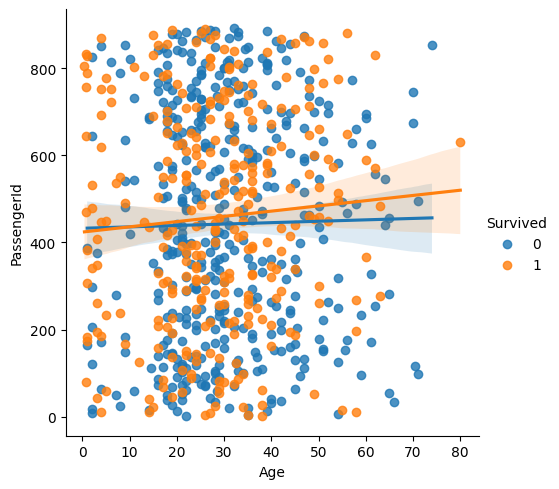

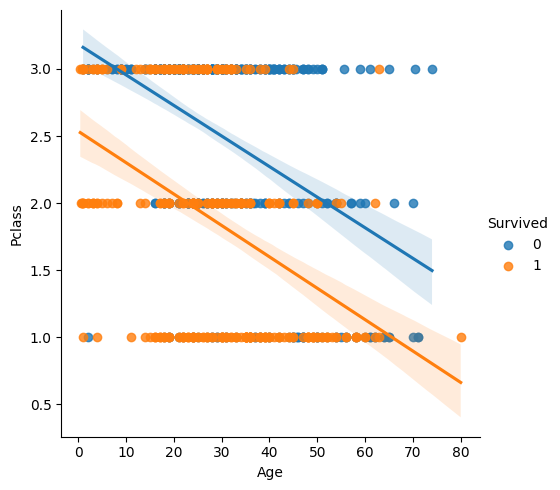

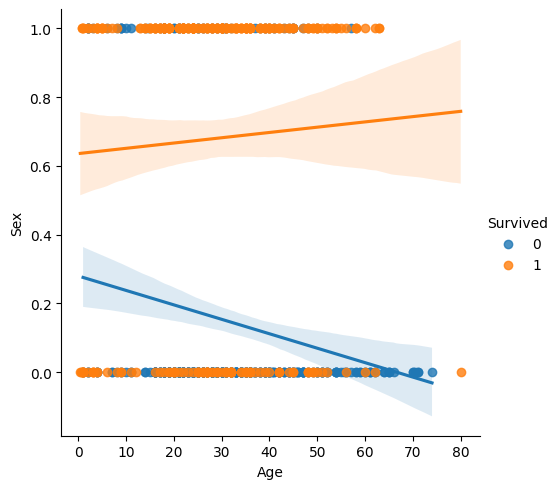

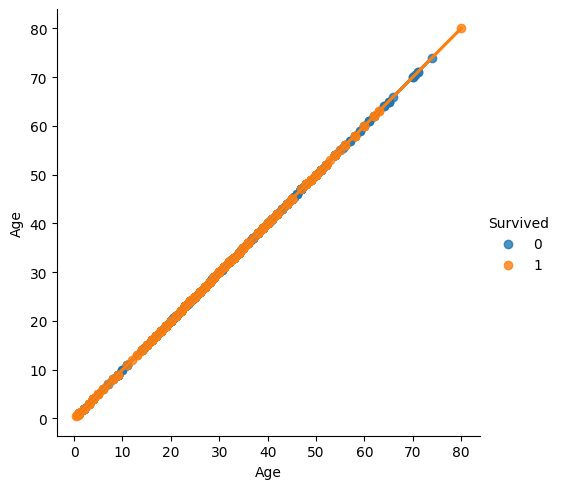

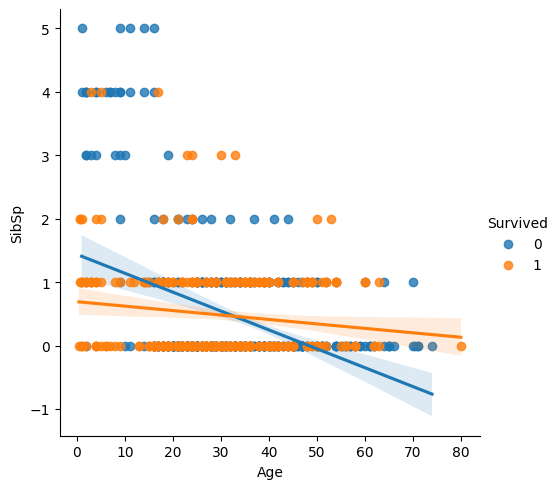

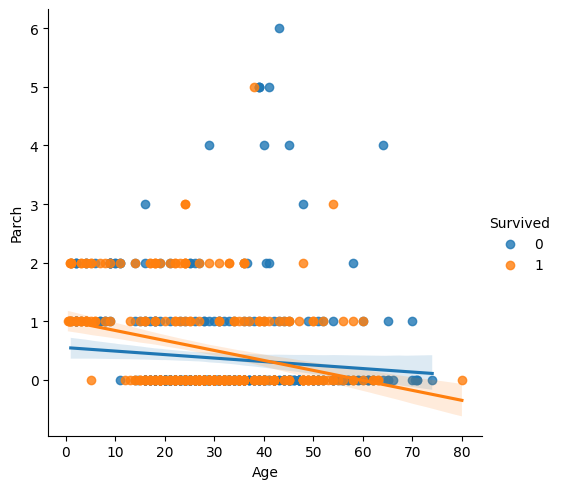

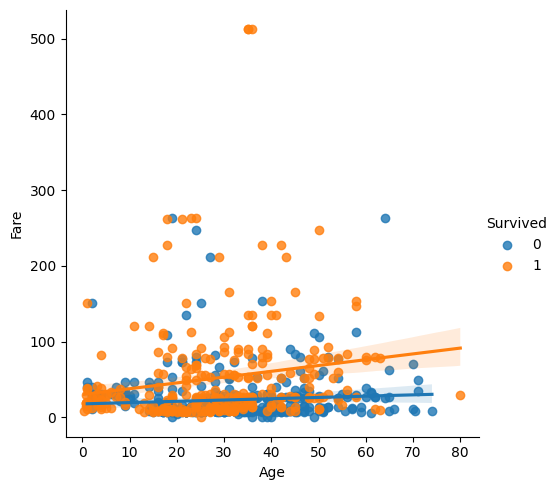

In [24]:
# Maintenant, vous pouvez tracer des graphiques pour chaque colonne
for col in df.select_dtypes(include=['float64','int64']).drop("Survived", axis=1, inplace=False).columns:
    sns.lmplot(x='Age', y=col, hue='Survived', data=df)
    plt.show()


In [27]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,C


In [35]:
#  Correlation
df.select_dtypes(include=['float64','int64']).corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Sex            0.543351
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [36]:
#  Distribution des survivants en fonction du sexe
pd.crosstab(df["Survived"], df["Sex"])


Sex,0,1
Survived,,
0,468,81
1,109,233


In [39]:
from scipy.stats import ttest_ind
# test de stooden ou k2 hypothese nulle, Ttest



In [37]:
# Obtenez les noms de caractéristiques après l'encodage one-hot
feature_names = preprocessing_onehotencoder.get_feature_names_out(colonne_texte)

# Convertissez la matrice creuse en DataFrame
df_encoded = pd.DataFrame(matrice_creuse.toarray(), columns=feature_names)

# Maintenant, vous pouvez tracer des graphiques pour chaque colonne
for col in df_encoded.columns:
    sns.lmplot(x='Age', y=col, hue='Survived', data=df_encoded)
    plt.show()


KeyError: "['Age', 'Survived'] not in index"

<Figure size 2000x1000 with 0 Axes>

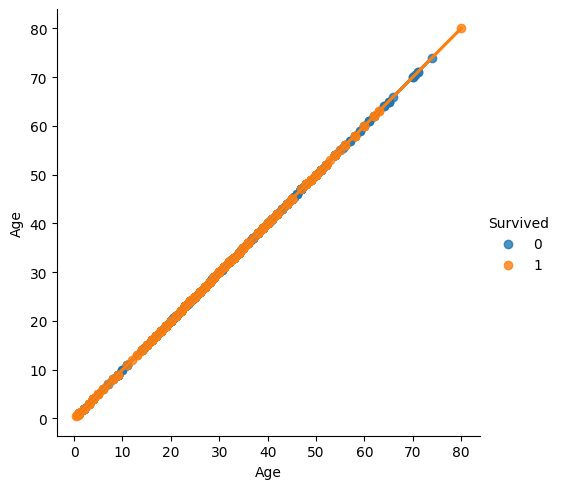

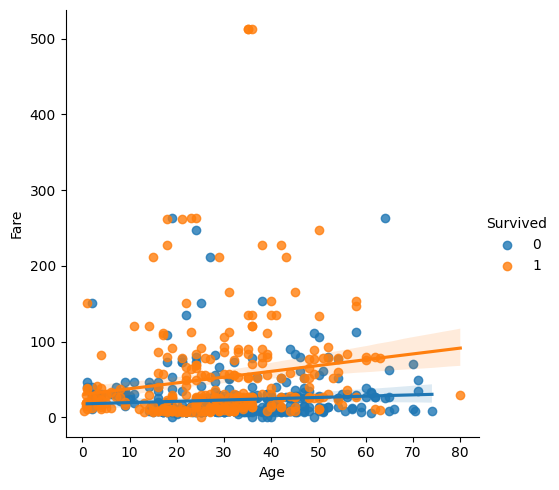

In [40]:
plt.figure(figsize=(20,10))

for col in df.select_dtypes('float64', 'int64').columns:
    sns.lmplot(x='Age', y=col, hue='Survived', data=df)

plt.show()


# COVID

In [41]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999


<IPython.core.display.Javascript object>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
pd.set_option('display.max_row', 111)
pd.set_option('display.max_column', 111)


In [44]:
url = 'https://raw.githubusercontent.com/MachineLearnia/Python-Machine-Learning/master/Dataset/dataset.csv'
data = pd.read_csv(url, index_col=0, encoding = "ISO-8859-1")


In [47]:
df = data.copy()


In [45]:
data.head()


,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [49]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False)


Mycoplasma pneumoniae                                    1.000000
Urine - Sugar                                            1.000000
Partial thromboplastin time (PTT)                        1.000000
Prothrombin time (PT), Activity                          1.000000
D-Dimer                                                  1.000000
Fio2 (venous blood gas analysis)                         0.999823
Urine - Nitrite                                          0.999823
Vitamin B12                                              0.999468
Lipase dosage                                            0.998583
Albumin                                                  0.997697
Arteiral Fio2                                            0.996456
Phosphor                                                 0.996456
Ferritin                                                 0.995925
Hb saturation (arterial blood gases)                     0.995216
pCO2 (arterial blood gas analysis)                       0.995216
Base exces

### heatmap


<Axes: ylabel='Patient ID'>

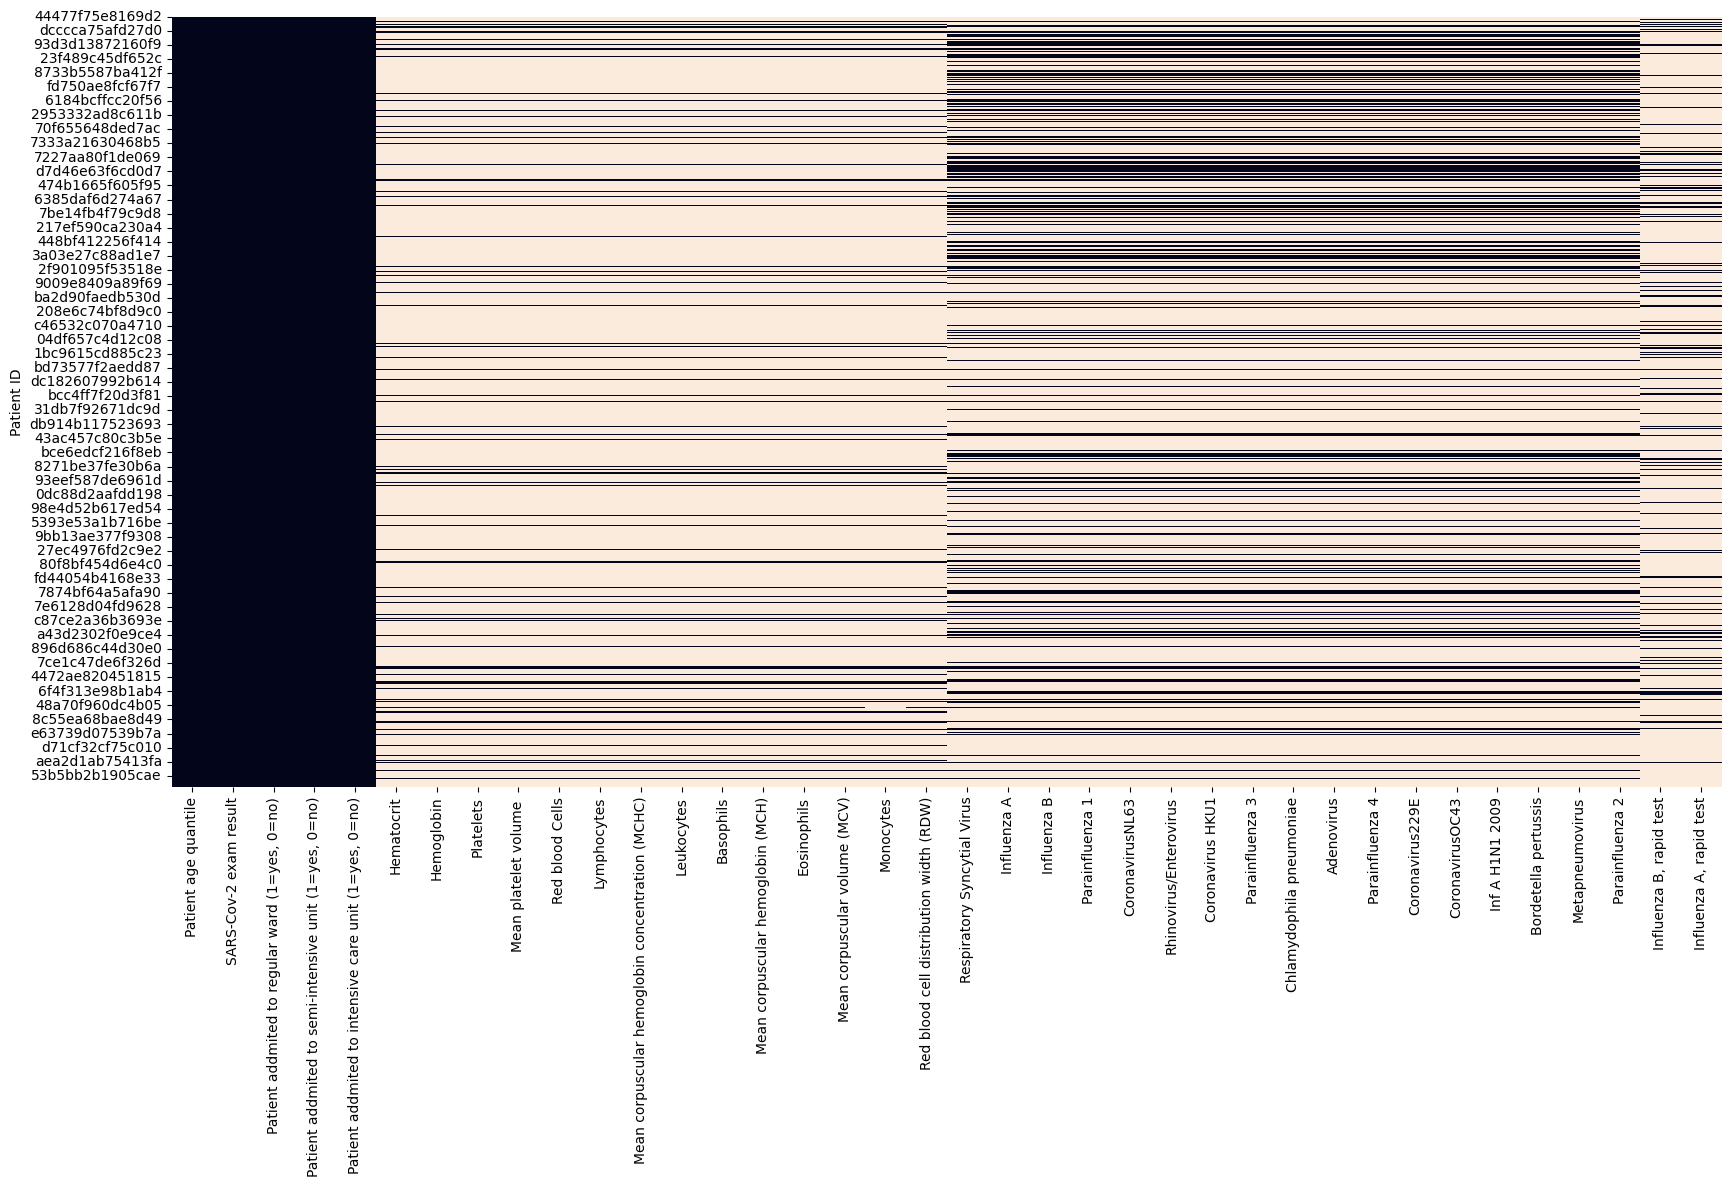

In [51]:
df = df[df.columns[df.isna().sum()/df.shape[0] <0.9]]
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)


In [52]:

for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique()}')


SARS-Cov-2 exam result---------------------------- ['negative' 'positive']
Respiratory Syncytial Virus----------------------- [nan 'not_detected' 'detected']
Influenza A--------------------------------------- [nan 'not_detected' 'detected']
Influenza B--------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 1----------------------------------- [nan 'not_detected' 'detected']
CoronavirusNL63----------------------------------- [nan 'not_detected' 'detected']
Rhinovirus/Enterovirus---------------------------- [nan 'detected' 'not_detected']
Coronavirus HKU1---------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 3----------------------------------- [nan 'not_detected' 'detected']
Chlamydophila pneumoniae-------------------------- [nan 'not_detected' 'detected']
Adenovirus---------------------------------------- [nan 'not_detected' 'detected']
Parainfluenza 4----------------------------------- [nan 'not_detected' 'detected']
Coronavirus2

### Relation Target / Variables

Création de sous-ensembles positifs et négatifs

In [53]:
positive_df = df[df['SARS-Cov-2 exam result'] == 'positive']
negative_df = df[df['SARS-Cov-2 exam result'] == 'negative']


Création des ensembles Blood et viral

In [54]:
missing_rate = df.isna().sum()/df.shape[0]
blood_columns = df.columns[(missing_rate < 0.9) & (missing_rate >0.88)]
viral_columns = df.columns[(missing_rate < 0.88) & (missing_rate > 0.75)]


### Graphes histplot pour voir si on a une normalité et des correlations 

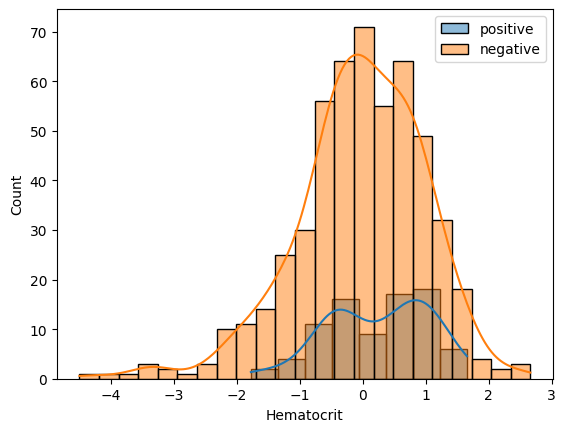

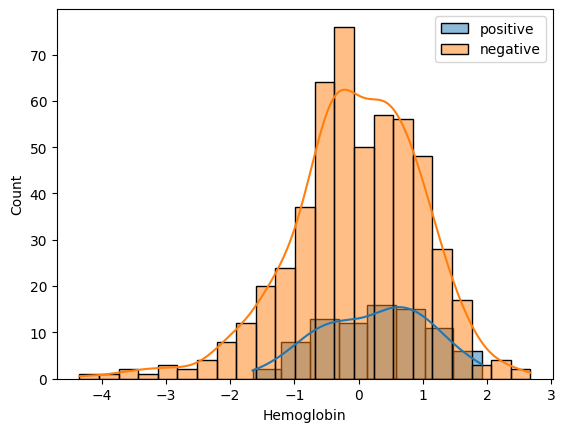

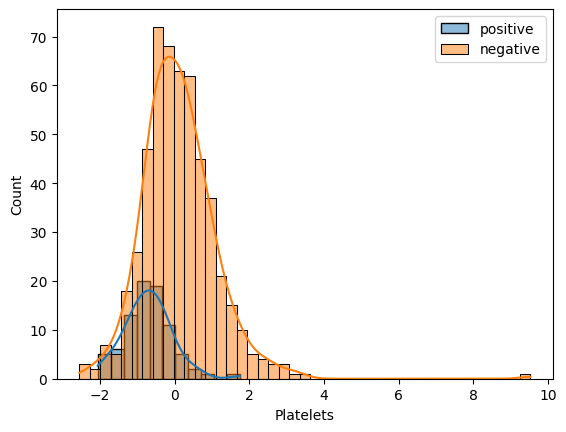

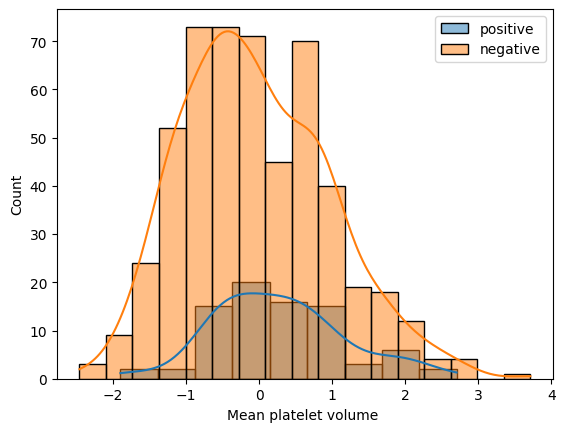

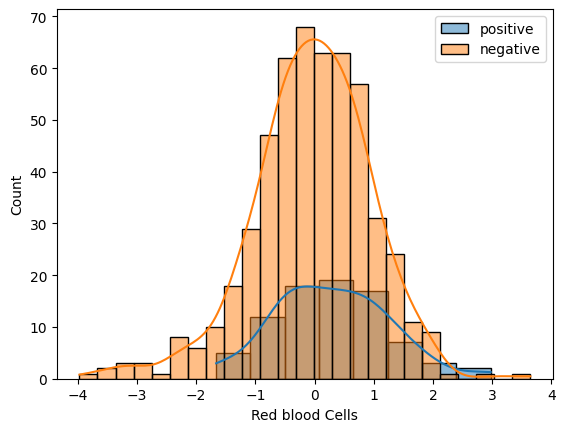

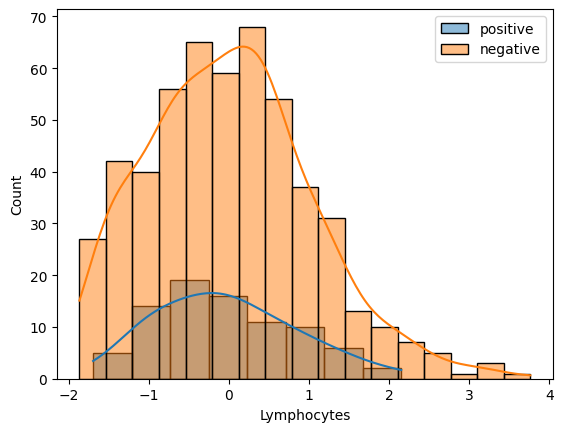

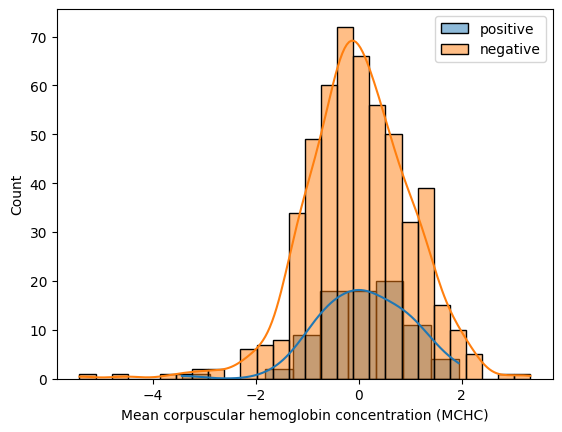

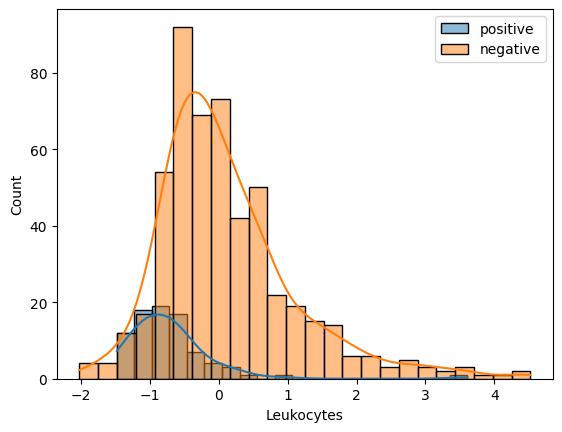

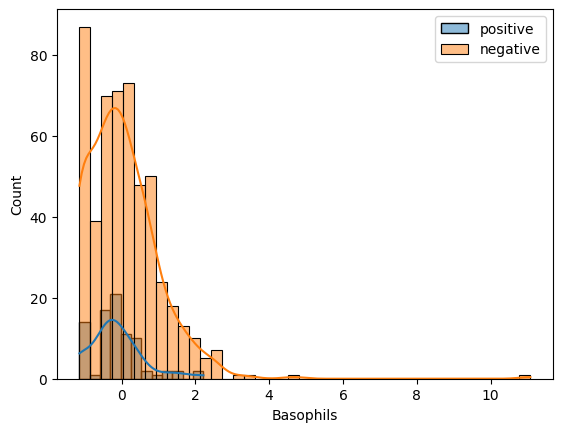

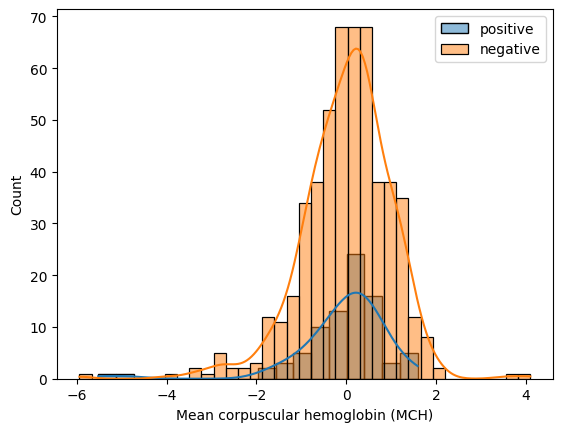

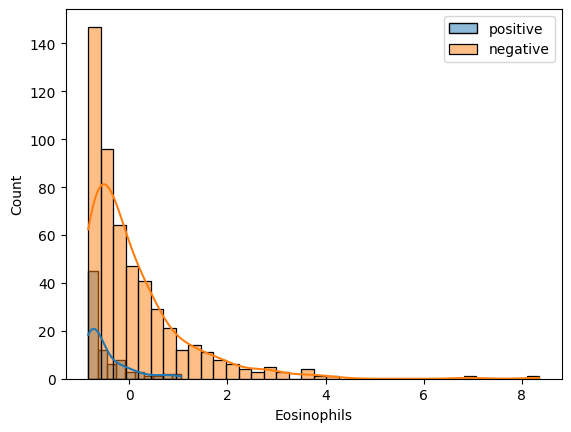

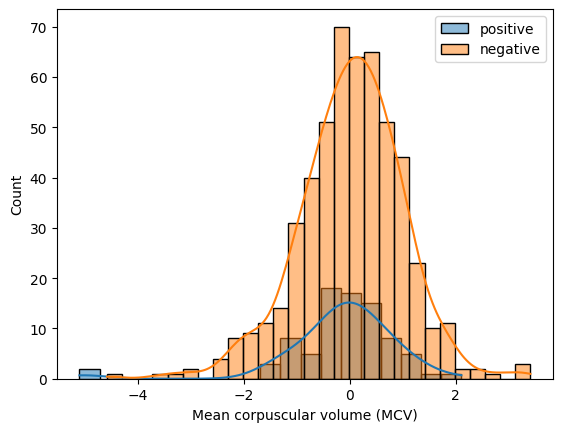

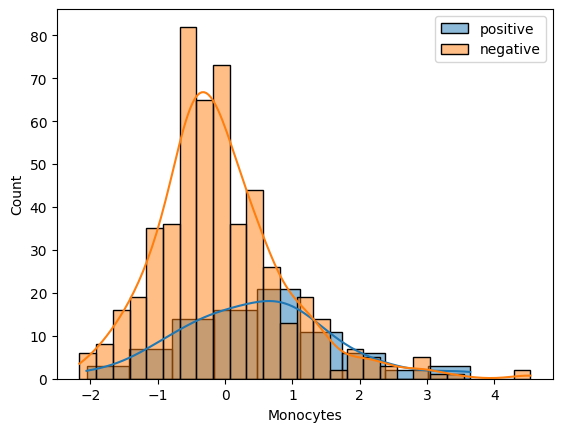

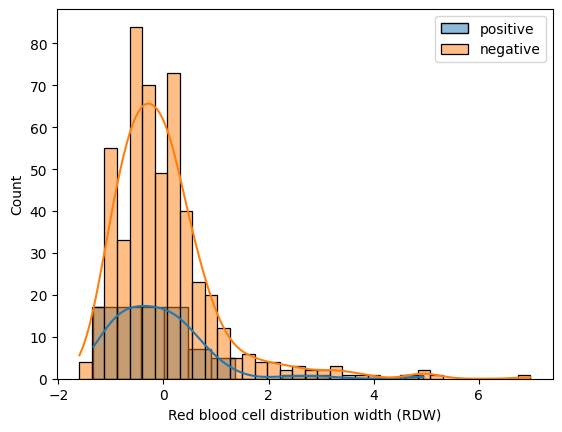

In [60]:
for col in blood_columns:
    plt.figure()
    sns.histplot(positive_df[col], label='positive', kde=True)
    sns.histplot(negative_df[col], label='negative', kde=True)
    plt.legend()
    plt.show()


### countplot

<Axes: xlabel='Patient age quantile', ylabel='count'>

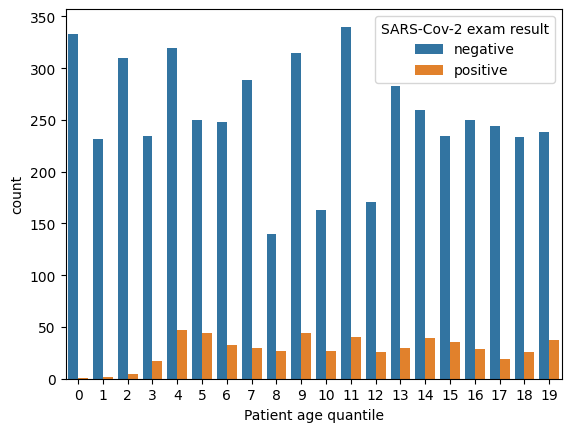

In [57]:
sns.countplot(x='Patient age quantile', hue='SARS-Cov-2 exam result', data=df)


In [59]:
from scipy.stats import ttest_ind

positive_df
balanced_neg = negative_df.sample(positive_df.shape[0])
def t_test(col):
    alpha = 0.02
    stat, p = ttest_ind(balanced_neg[col].dropna(), positive_df[col].dropna())
    if p < alpha:
        return 'H0 Rejetée'
    else :
        return 0

for col in blood_columns:
    print(f'{col :-<50} {t_test(col)}')


Hematocrit---------------------------------------- 0
Hemoglobin---------------------------------------- H0 Rejetée
Platelets----------------------------------------- H0 Rejetée
Mean platelet volume ----------------------------- 0
Red blood Cells----------------------------------- 0
Lymphocytes--------------------------------------- 0
Mean corpuscular hemoglobin concentration (MCHC)-- 0
Leukocytes---------------------------------------- H0 Rejetée
Basophils----------------------------------------- 0
Mean corpuscular hemoglobin (MCH)----------------- 0
Eosinophils--------------------------------------- H0 Rejetée
Mean corpuscular volume (MCV)--------------------- 0
Monocytes----------------------------------------- H0 Rejetée
Red blood cell distribution width (RDW)----------- 0
